importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load dataset

In [7]:
data = pd.read_excel('Rotten_Tomatoes_Movies3.xls')

In [9]:
data.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [11]:
data.tail()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2004-08-03,142.0,Fox,Fresh,78,9,87.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0
16637,Zulu Dawn,"A prequel to Zulu, Zulu Dawn depicts the event...",NaN,PG,"Action & Adventure, Art House & International,...",Douglas Hickox,"Cy Endfield, Anthony Storey","Burt Lancaster, Peter O'Toole, Simon Ward, Joh...",1979-12-14,2005-09-27,117.0,Tango Entertainment,Rotten,57,7,62.0


data preprocessing

In [23]:
data.shape

(16638, 16)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

identify catagorical and numarical data

In [65]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    data[column].fillna(data[column].median(), inplace=True)

print(data[numerical_columns].head())

   rating  genre  directors  writers   cast  runtime_in_minutes  \
0       3    217       1329     2321   9763                83.0   
1       6    752       5911     8700   2477                90.0   
2       6    860        886     1285   4251               118.0   
3       2    689       7281     9576  10309                95.0   
4       0    286       6584     3358   6723               127.0   

   tomatometer_status  tomatometer_rating  tomatometer_count  audience_rating  
0                   2                  49                144             53.0  
1                   0                  86                140             64.0  
2                   1                  68                 22             53.0  
3                   0                 100                 51             97.0  
4                   1                  89                 27             74.0  


C:\Users\Admin\AppData\Local\Temp\ipykernel_11832\788562225.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)


In [67]:
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

print(data[categorical_columns].head())

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [15]:
data.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

<Axes: >

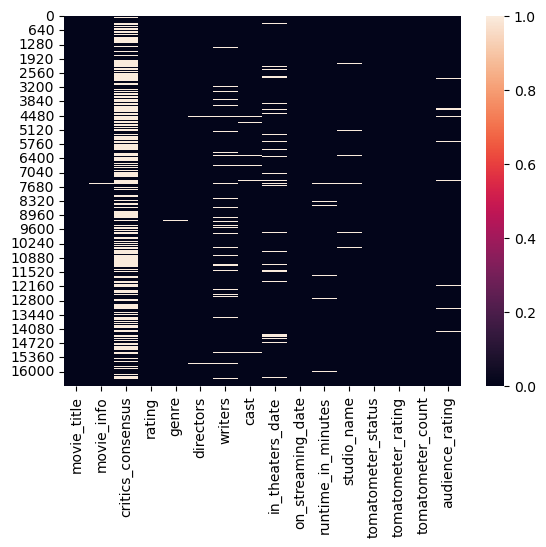

In [29]:
sns.heatmap(data.isnull())

In [33]:
columns_to_drop = ['movie_title', 'movie_info', 'critics_consensus', 
                   'in_theaters_date', 'on_streaming_date', 'studio_name']
data = data.drop(columns=columns_to_drop, axis=1)


In [45]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for column in categorical_columns:
    if column in data.columns:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])


for column, encoder in label_encoders.items():
    print(f"Label Encoding for '{column}':")
    print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
    print()

Split the data into train and test sets

In [47]:
from sklearn.model_selection import train_test_split

X = data.drop('audience_rating', axis=1)
y = data['audience_rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train the model

In [51]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Make predictions

In [53]:
y_pred = model.predict(X_test)

Evaluate the model

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:\nMean Squared Error: {mse:.2f}\nR² Score: {r2:.2f}")


Model Performance:
Mean Squared Error: 209.80
R² Score: 0.49


Data Visualization

In [57]:
feature_importance = model.feature_importances_
features = X.columns

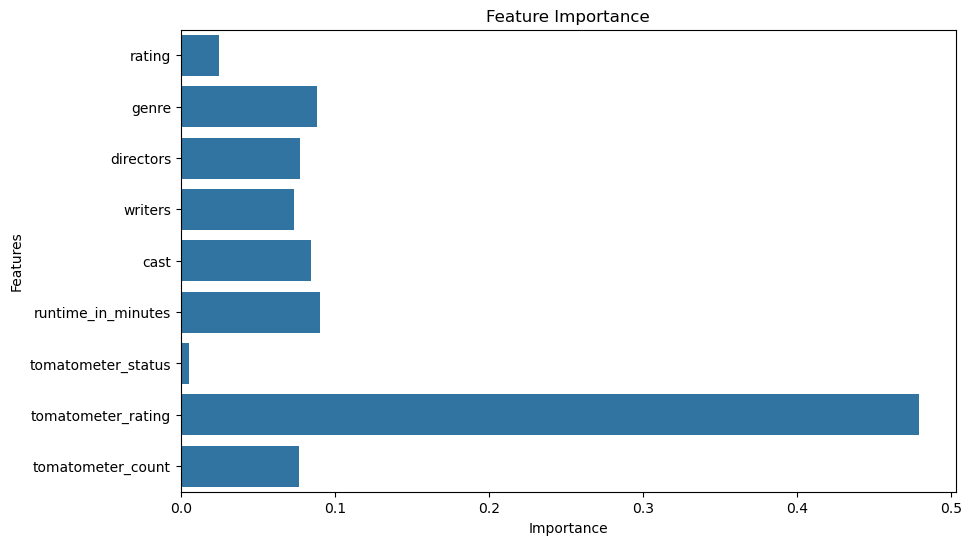

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

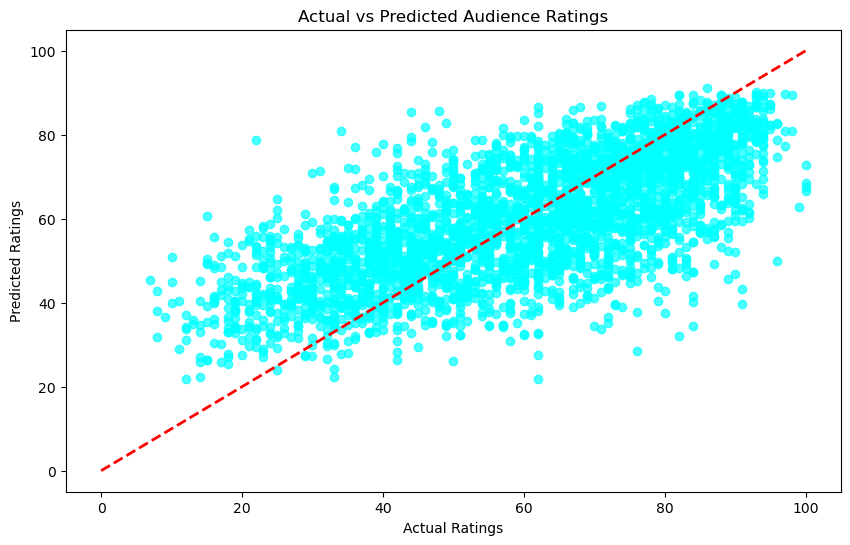

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='cyan')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Audience Ratings")
plt.show()

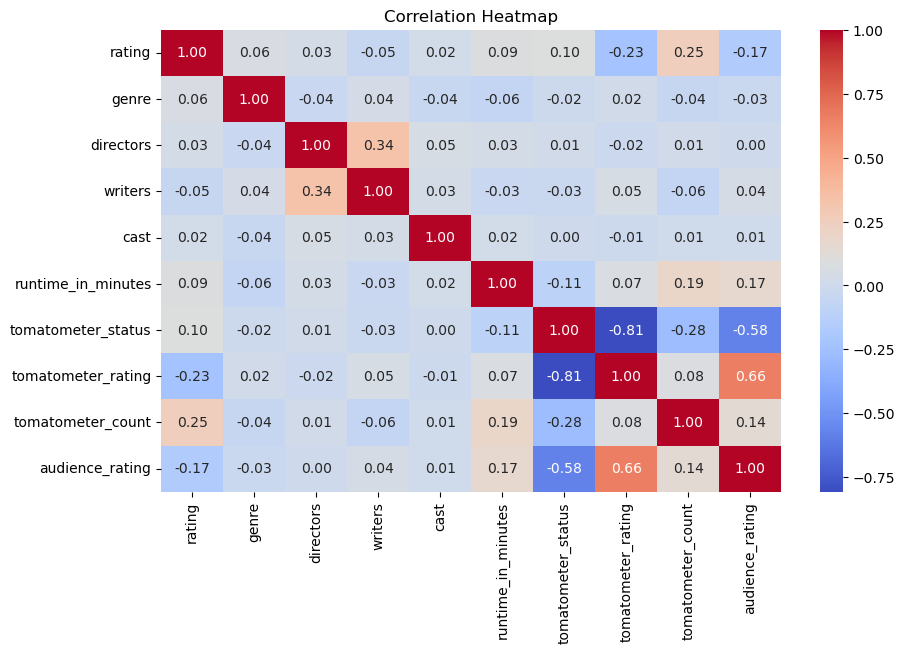

In [63]:
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


The model explains about 49% of the audience ratings, but its predictions are not very accurate, with a high MSE of 209.80. There is room for improvement by using better features or more complex models.

In [89]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
# Initialize the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [97]:
# Predictions
y_pred = xgb_model.predict(X_test)

In [99]:
# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [101]:
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 210.8459063064233
R² Score: 0.48317163599177226


In [103]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
# Initialize the model
svr_model = SVR(kernel='rbf')

In [109]:
# Train the model
svr_model.fit(X_train, y_train)

SVR()

In [113]:
# Predictions
y_pred = svr_model.predict(X_test)

In [115]:
# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [117]:
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 219.4487143897174
R² Score: 0.4620843153724


In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
# Initialize the model
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [128]:
# Compile the model
model_nn.compile(optimizer='adam', loss='mean_squared_error')

In [132]:
# Train the model
model_nn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 2840.2949
Epoch 2/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 285.7646
Epoch 3/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 297.5380
Epoch 4/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 277.9417
Epoch 5/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 330.2847
Epoch 6/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 259.0421
Epoch 7/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 236.7379
Epoch 8/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 246.2950
Epoch 9/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 232.0198
Epoch 10/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 227.9093
Epoch 11/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 222.8024
Epoch 12/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 220.9149
Epoch 13/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 228.3453
Epoch 14/100
416/416 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 216.2935
Epoch 15/10

In [134]:
# Predictions
y_pred = model_nn.predict(X_test)

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [136]:
# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [138]:
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 209.91201756168118
R² Score: 0.48546079683234034


In [140]:
from sklearn.model_selection import GridSearchCV

In [142]:
# Example: Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [144]:
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]})

In [146]:
# Best parameters and performance
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}
Best score: 0.5286949924737625


XGBoost outperforms Random Forest with a higher R² score of 0.5287 and a lower MSE

save the model

In [148]:
import joblib
joblib.dump(model, 'audience_rating_model.pkl')

['audience_rating_model.pkl']